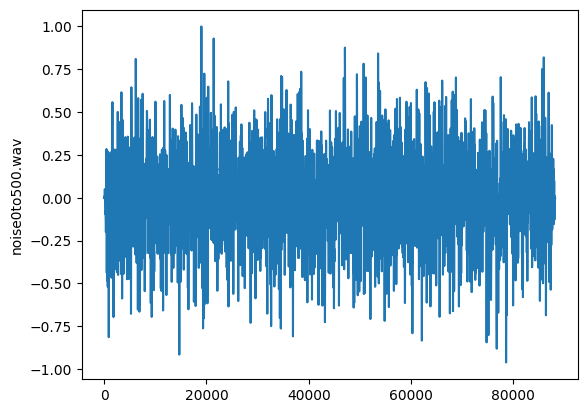

In [3]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'noise0to500.wav'
desired_sample_rate = 8000.0
desired_resolution = 13
range = 2**desired_resolution - 1

data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()



In [4]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[-7.4804993e-05 -2.0544151e-04  6.3042121e-04 ... -1.2824758e-03
  1.0422888e-03  1.1267914e-03]
length 16000
max value 0.9995812
min value -0.9596675
value range 1.9592488


In [5]:
filename = soundfile[:-4]
m68code = "/*\n    File "+soundfile+ "\r\n*/\r\n\n"
m68code += "#define "+ filename + "_length "+str(len(data_out))+" \r\n\r\n"
m68code += "#define "+ filename + "_sample_rate " + str(int(desired_sample_rate)) + "\r\n\r\n"
m68code += "const uint16_t " + filename + "_data[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    # scale to between 0 and range
    v = int(isin*range)
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)    

/*
    File noise0to500.wav
*/

#define noise0to500_length 16000 

#define noise0to500_sample_rate 8000

const uint16_t noise0to500_data[] = {
    4011,4011,4014,4021,4031,4040,4046,4048,4044,4036,4023,4010,3999,3993,3996,4010,
    4034,4067,4106,4146,4183,4210,4223,4218,4195,4152,4092,4021,3943,3864,3790,3726,
    3676,3641,3621,3615,3619,3630,3645,3659,3671,3679,3681,3679,3673,3662,3649,3632,
    3611,3585,3553,3516,3472,3423,3371,3319,3270,3228,3197,3179,3176,3186,3208,3240,
    3278,3319,3362,3407,3456,3516,3591,3690,3816,3975,4164,4377,4601,4818,5007,5143,
    5200,5151,4997,4742,4398,3990,3550,3116,2730,2427,2238,2181,2259,2460,2759,3116,
    3485,3818,4070,4207,4207,4067,3803,3446,3041,2643,2304,2075,1991,2072,2316,2703,
    3191,3726,4246,4689,5002,5145,5100,4869,4478,3973,3412,2861,2386,2040,1862,1870,
    2057,2396,2840,3329,3799,4189,4450,4549,4475,4240,3876,3434,2971,2549,2223,2034,
    2005,2137,2411,2785,3206,3614,3948,4158,4207,4079,3781,3339,2797,2215,1652,1170,
    820